# DATA PROGRAMMING IN PYTHON FINAL PROJECT
### Names: Michael Lee, Andrew McQueen, Munju Kam, Stephen Schmidt, Cindy Shen

Data Source: https://catalog.data.gov/dataset/cable-office-speed-test

Description: The data includes ISP speed test results collected from user input 
throughout the county. Speed test results are updated weekly. The dataset includes 
survey information about internet performance in Montgomery County, Maryland.

## Import Packages & Reading CSV File into Data Frame

In [1]:
import os
import pandas as pd
import numpy as np
from ipywidgets import widgets, interactive, Layout

In [2]:
os.getcwd() #check working directory

'C:\\Users\\andre\\atmcqueen'

In [3]:
cable_speed_df = pd.read_csv("Cable_Office_Speed_Test.csv", header = 'infer')
cable_speed_df

,Response,Date,Time,How Are You Testing,Zip,Provider,How are you connected,Price Per Month,Advertised Download Speed,Satisfaction Rating,...,Actual Price Per Mbps,Ping,Additional Comments,What kind of service plan do you have?,Where are you accessing the internet,What are you using the internet for?,Indoor,Do you buy mobile data alone or bundle with talk and text?,How much is your monthly bill?,Is your data plan unlimited?
0,3125,11/08/2017,13:00,Work,20814,NaN,NaN,NaN,NaN,NaN,...,NaN,24.0,NaN,NaN,NaN,NaN,indoor,NaN,NaN,NaN
1,1183,07/18/2017,09:36,Work,20855,NaN,NaN,NaN,NaN,NaN,...,NaN,20.0,NaN,NaN,NaN,NaN,indoor,NaN,NaN,NaN
2,204,12/20/2016,12:13,Work,20852,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,NaN,NaN,NaN,NaN,indoor,NaN,NaN,NaN
3,436,07/05/2017,14:12,Work,20850,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,NaN,NaN,NaN,NaN,indoor,NaN,NaN,NaN
4,3022,11/06/2017,14:20,Home,20852,Comcast,Wired,NaN,NaN,NaN,...,NaN,16.0,NaN,NaN,NaN,NaN,indoor,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4070,4965,06/30/2021,10:07,Home,20853,Comcast,Wired,150.0,400.0,3.0,...,4.0,22.0,NaN,NaN,NaN,NaN,indoor,NaN,NaN,NaN
4071,4967,07/21/2021,14:57,Home,20855,Comcast,"Wired with WiFi, multiple devices in household",40.0,200.0,NaN,...,2.0,42.0,NaN,NaN,NaN,NaN,indoor,NaN,NaN,NaN
4072,4968,07/21/2021,14:59,Home,20855,Comcast,"Wired with WiFi, multiple devices in household",40.0,200.0,NaN,...,1.0,43.0,NaN,NaN,NaN,NaN,indoor,NaN,NaN,NaN
4073,4970,07/29/2021,16:12,Home,20878,Comcast,Wired,NaN,NaN,NaN,...,NaN,38.0,NaN,NaN,NaN,NaN,indoor,NaN,NaN,NaN


In [4]:
#CREATE DATA FRAME COPY
cs_df = cable_speed_df.copy()

#### Note: Use "cs_df" for data cleaning/preprocessing and analysis. Do not make any changes to original data frame "cable_speed_df"

## Data Characteristics

In [5]:
#Check data information
cs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4075 entries, 0 to 4074
Data columns (total 23 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Response                                                    4075 non-null   int64  
 1   Date                                                        4075 non-null   object 
 2   Time                                                        4075 non-null   object 
 3   How Are You Testing                                         4075 non-null   object 
 4   Zip                                                         4075 non-null   int64  
 5   Provider                                                    3728 non-null   object 
 6   How are you connected                                       3640 non-null   object 
 7   Price Per Month                                             1973 non-null   float64
 8 

## Data Preprocessing/Cleaning

### Joining City Population Data to Data Frame

In [6]:
unique_zip = cs_df.Zip.unique()

City Name Source: https://mde.state.md.us/programs/LAND/RecyclingandOperationsprogram/Documents/www.mde.state.md.us/assets/document/zip_codes.pdf

Population Source: https://www.maryland-demographics.com/cities_by_population

In [7]:
#Load city names data
city_pop_df = pd.read_excel("city_population_data.xlsx", header = 'infer')
city_pop_df = city_pop_df[city_pop_df['Zip'].isin(unique_zip)]
city_pop_df.head(n = 15)

,Zip,city_name,population
25,20861.0,Ashton-Sandy Spring,5746.0
79,20838.0,Barnesville,144.0
82,20839.0,Beallsville,102.0
88,20705.0,Beltsville,20133.0
93,20814.0,Bethesda,68056.0
94,20816.0,Bethesda,68056.0
95,20817.0,Bethesda,68056.0
118,20841.0,Boyds,10887.0
124,20833.0,Brookeville,166.0
134,20866.0,Burtonsville,9498.0


In [8]:
#Left join cs_df with city_names_df
cs_df = cs_df.merge(city_pop_df, on = 'Zip', how = 'left')

In [9]:
#Review data
cs_df

,Response,Date,Time,How Are You Testing,Zip,Provider,How are you connected,Price Per Month,Advertised Download Speed,Satisfaction Rating,...,Additional Comments,What kind of service plan do you have?,Where are you accessing the internet,What are you using the internet for?,Indoor,Do you buy mobile data alone or bundle with talk and text?,How much is your monthly bill?,Is your data plan unlimited?,city_name,population
0,3125,11/08/2017,13:00,Work,20814,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,indoor,NaN,NaN,NaN,Bethesda,68056.0
1,1183,07/18/2017,09:36,Work,20855,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,indoor,NaN,NaN,NaN,Derwood,2535.0
2,204,12/20/2016,12:13,Work,20852,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,indoor,NaN,NaN,NaN,Rockville,67117.0
3,436,07/05/2017,14:12,Work,20850,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,indoor,NaN,NaN,NaN,Rockville,67117.0
4,3022,11/06/2017,14:20,Home,20852,Comcast,Wired,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,indoor,NaN,NaN,NaN,Rockville,67117.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4070,4965,06/30/2021,10:07,Home,20853,Comcast,Wired,150.0,400.0,3.0,...,NaN,NaN,NaN,NaN,indoor,NaN,NaN,NaN,Rockville,67117.0
4071,4967,07/21/2021,14:57,Home,20855,Comcast,"Wired with WiFi, multiple devices in household",40.0,200.0,NaN,...,NaN,NaN,NaN,NaN,indoor,NaN,NaN,NaN,Derwood,2535.0
4072,4968,07/21/2021,14:59,Home,20855,Comcast,"Wired with WiFi, multiple devices in household",40.0,200.0,NaN,...,NaN,NaN,NaN,NaN,indoor,NaN,NaN,NaN,Derwood,2535.0
4073,4970,07/29/2021,16:12,Home,20878,Comcast,Wired,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,indoor,NaN,NaN,NaN,Gaithersburg,69657.0


In [10]:
cs_df[cs_df.city_name.isnull()].Zip.unique()

array([], dtype=int64)

### Updating Column Names and Values

In [11]:
#Alter space with underscore for column names
cs_df.columns = [c.replace(' ', '_') for c in cs_df.columns]

In [12]:
#Review unique provider
cs_df.Provider.unique()

array([nan, 'Comcast', 'Verizon Fios', 'Verizon DSL', 'RCN',
       'Allied Telecom', 'AT&T', 'T Mobile', 'Verizon', 'Cricket',
       'Comcast Business', 'Atlantech', 'Sprint', 'Other',
       'Atlantech Online', 'Windstream DSL', 'ATT', 'I don’t know'],
      dtype=object)

In [13]:
#Update provider values
cs_df['Provider'].replace({"ATT": "AT&T", "I don’t know": "Unknown"}, inplace = True)

print("ATT" in cs_df.Provider, "I don’t know" in cs_df.Provider)

False False


In [14]:
#Drop uncesseary columns
cs_df = cs_df.drop(["Additional_Comments","What_kind_of_service_plan_do_you_have?","Where_are_you_accessing_the_internet","What_are_you_using_the_internet_for?","Indoor","Do_you_buy_mobile_data_alone_or_bundle_with_talk_and_text?","How_much_is_your_monthly_bill?","Is_your_data_plan_unlimited?"], axis=1)

### Handling Null Values

In [15]:
#Exclude rows with no internet provider
cs_df = cs_df[cs_df['Provider'].notna()]
cs_df = cs_df[cs_df['How_are_you_connected'].notna()]
print(len(cs_df))

3640


In [16]:
cs_df.groupby("Provider").Price_Per_Month.count()

Provider
Allied Telecom         1
Atlantech              1
Atlantech Online       1
Comcast              546
Comcast Business       6
Other                 12
RCN                   73
T Mobile               0
Unknown                1
Verizon                3
Verizon DSL           35
Verizon Fios        1292
Windstream DSL         2
Name: Price_Per_Month, dtype: int64

In [17]:
#Fill null values in the columns in column list with the average value for its provider, or by the column average
col_list = ['Price_Per_Month', 'Advertised_Download_Speed', 'Satisfaction_Rating', 
            'Advertised_Price_Per_Mbps', 'Actual_Price_Per_Mbps', 'Ping']
for col_name in col_list:
    cs_df[col_name] = cs_df[col_name].fillna(cs_df.groupby('Provider')[col_name].transform('mean'))
    cs_df[col_name] = cs_df[col_name].fillna(cs_df[col_name].mean())
    print(col_name, cs_df[col_name].notnull().sum(), sep = "---")

Price_Per_Month---3640
Advertised_Download_Speed---3640
Satisfaction_Rating---3640
Advertised_Price_Per_Mbps---3640
Actual_Price_Per_Mbps---3640
Ping---3640


### Final Data Frame Characteristics

In [18]:
def displaydf(dataframe):
    return print(dataframe.info())

In [19]:
displaydf(cs_df)
#cs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3640 entries, 4 to 4074
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Response                   3640 non-null   int64  
 1   Date                       3640 non-null   object 
 2   Time                       3640 non-null   object 
 3   How_Are_You_Testing        3640 non-null   object 
 4   Zip                        3640 non-null   int64  
 5   Provider                   3640 non-null   object 
 6   How_are_you_connected      3640 non-null   object 
 7   Price_Per_Month            3640 non-null   float64
 8   Advertised_Download_Speed  3640 non-null   float64
 9   Satisfaction_Rating        3640 non-null   float64
 10  Download_Speed             3640 non-null   int64  
 11  Upload_Speed               3640 non-null   int64  
 12  Advertised_Price_Per_Mbps  3640 non-null   float64
 13  Actual_Price_Per_Mbps      3640 non-null   float

## QUESTIONS:
### 1. Which variables are most important in determining service quality?
### 2. How does plan price affect speed?
### 3. What machine learning model is best predicting satisfaction?
### 4. How does price and performance change over time?
### 5. How does city population affect speed?

## Exploratory Analysis

In [20]:
#Review satisfaction rating by provider
provider=cs_df.groupby(["Provider"]).Price_Per_Month.mean()
provider = provider.sort_values(ascending=True)
provider

Provider
Unknown               1.000000
Verizon DSL          53.457143
Other                67.583333
RCN                  68.465753
Windstream DSL       70.000000
Verizon              76.000000
T Mobile             84.360560
Verizon Fios         84.419505
Comcast              87.692308
Atlantech Online     99.000000
Allied Telecom      100.000000
Comcast Business    152.833333
Atlantech           246.000000
Name: Price_Per_Month, dtype: float64

In [21]:
#Create user-defined function for bar graph
def createbar(column):
    return column.plot(kind="barh")

<AxesSubplot:ylabel='Provider'>

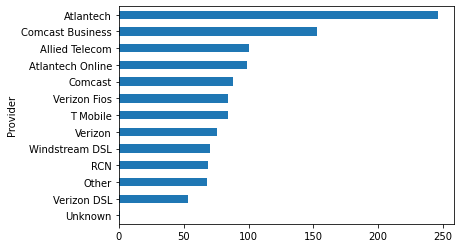

In [22]:
createbar(provider)
#provider.plot(kind="barh")

In [23]:
#Review satisfaction rating by price
satisfaction_price=cs_df.groupby(["Satisfaction_Rating"]).Price_Per_Month.mean()
satisfaction_price = satisfaction_price.sort_values(ascending=True)
satisfaction_price

Satisfaction_Rating
2.551724     56.740571
3.488372     61.115949
3.266667     67.583333
5.000000     80.263829
4.000000     82.204697
3.369165     82.405044
3.043548     84.586941
2.000000     86.384522
3.000000     88.416613
1.000000     92.215295
3.248194    100.000000
3.200000    152.833333
Name: Price_Per_Month, dtype: float64

In [24]:
#Review Download speed by connection type
connectiond=cs_df.groupby(["How_are_you_connected"]).Download_Speed.mean()
connectiond = connectiond.sort_values(ascending=True)
connectiond

How_are_you_connected
Wireless connection, single device                 40.000000
Wired with WiFi, single device                     46.805281
Wired with WiFi, multiple devices in household     58.249593
Wireless connection, multiple devices              76.545455
Wired                                              99.489244
Wired connection                                  153.756098
Name: Download_Speed, dtype: float64

<AxesSubplot:ylabel='How_are_you_connected'>

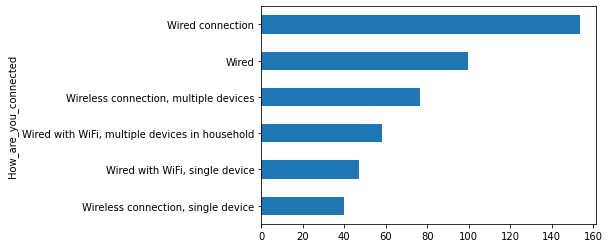

In [25]:
createbar(connectiond)
#connectiond.plot(kind="barh")

In [26]:
#Review upload speed by connection type
connectionu=cs_df.groupby(["How_are_you_connected"]).Upload_Speed.mean()
connectionu = connectionu.sort_values(ascending=True)
connectionu

How_are_you_connected
Wireless connection, single device                 2.000000
Wired with WiFi, single device                    37.841584
Wireless connection, multiple devices             42.636364
Wired with WiFi, multiple devices in household    43.648399
Wired                                             45.115892
Wired connection                                  72.463415
Name: Upload_Speed, dtype: float64

<AxesSubplot:ylabel='How_are_you_connected'>

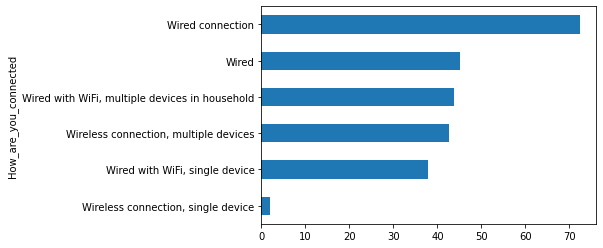

In [27]:
createbar(connectionu)
#connectionu.plot(kind="barh")

In [28]:
#Extract year from Date Column
cs_df["Year"] = cs_df["Date"].str[-4:]
cs_df["Month"] = cs_df["Date"].str[:2]
cs_df["Time1"] = cs_df["Time"].str[:2]
cs_df

,Response,Date,Time,How_Are_You_Testing,Zip,Provider,How_are_you_connected,Price_Per_Month,Advertised_Download_Speed,Satisfaction_Rating,Download_Speed,Upload_Speed,Advertised_Price_Per_Mbps,Actual_Price_Per_Mbps,Ping,city_name,population,Year,Month,Time1
4,3022,11/06/2017,14:20,Home,20852,Comcast,Wired,87.692308,227.512766,3.043548,99,13,3.360382,8.513126,16.0,Rockville,67117.0,2017,11,14
8,448,07/07/2017,10:48,Home,20901,Comcast,Wired,87.692308,227.512766,3.000000,33,6,3.360382,8.513126,23.0,Silver Spring,81015.0,2017,07,10
13,545,07/07/2017,16:23,Home,20814,Comcast,Wired,87.692308,227.512766,3.043548,58,16,3.360382,8.513126,12.0,Bethesda,68056.0,2017,07,16
15,1988,10/31/2017,15:42,Home,20877,Verizon Fios,Wired,84.419505,389.284830,3.369165,62,105,2.241128,10.768881,7.0,Gaithersburg,69657.0,2017,10,15
18,1504,08/20/2017,13:07,Home,20854,Comcast,Wired,87.692308,227.512766,3.000000,130,7,3.360382,8.513126,14.0,Potomac,47018.0,2017,08,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4070,4965,06/30/2021,10:07,Home,20853,Comcast,Wired,150.000000,400.000000,3.000000,37,12,0.000000,4.000000,22.0,Rockville,67117.0,2021,06,10
4071,4967,07/21/2021,14:57,Home,20855,Comcast,"Wired with WiFi, multiple devices in household",40.000000,200.000000,3.043548,20,4,0.000000,2.000000,42.0,Derwood,2535.0,2021,07,14
4072,4968,07/21/2021,14:59,Home,20855,Comcast,"Wired with WiFi, multiple devices in household",40.000000,200.000000,3.043548,38,5,0.000000,1.000000,43.0,Derwood,2535.0,2021,07,14
4073,4970,07/29/2021,16:12,Home,20878,Comcast,Wired,87.692308,227.512766,3.043548,14,13,3.360382,8.513126,38.0,Gaithersburg,69657.0,2021,07,16


In [29]:
#Review Price by year
price_year=cs_df.groupby(["Year"]).Price_Per_Month.mean()
price_year

Year
2016    90.483516
2017    85.358579
2018    84.814479
2019    79.776915
2020    80.012157
2021    80.767669
Name: Price_Per_Month, dtype: float64

In [30]:
def createline(column):
    return column.plot(kind="line")

<AxesSubplot:xlabel='Year'>

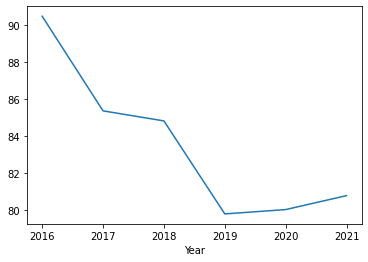

In [31]:
createline(price_year)
#price_year.plot(kind="line")

In [32]:
#Review download speed by year
speed_year=cs_df.groupby(["Year"]).Download_Speed.mean()
speed_year

Year
2016     54.214286
2017     63.756107
2018     94.123426
2019    112.955947
2020     95.086486
2021    164.339623
Name: Download_Speed, dtype: float64

<AxesSubplot:xlabel='Year'>

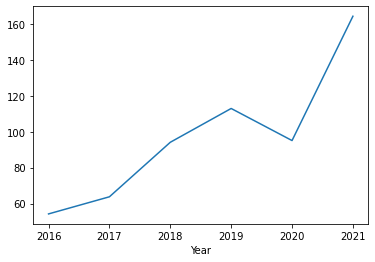

In [33]:
createline(speed_year)
#speed_year.plot(kind="line")

In [34]:
#Review download speed by month
speed_month=cs_df.groupby(["Month"]).Download_Speed.mean()
speed_month

Month
01    92.085271
02    78.532258
03    83.519685
04    75.196078
05    78.138462
06    79.628866
07    60.645882
08    85.230392
09    89.873016
10    88.540404
11    70.758212
12    76.571429
Name: Download_Speed, dtype: float64

<AxesSubplot:xlabel='Month'>

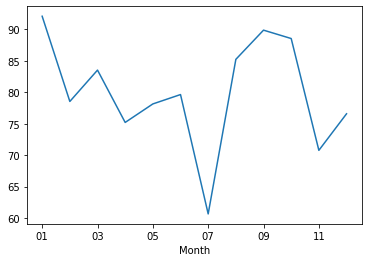

In [35]:
createline(speed_month)
#speed_month.plot(kind="line")

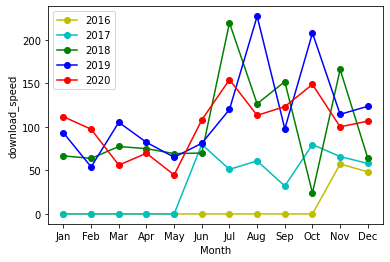

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

year16 = cs_df[cs_df['Year'] == '2016'].groupby(["Month"]).Download_Speed.mean()
year17 = cs_df[cs_df['Year'] == '2017'].groupby(["Month"]).Download_Speed.mean()
year18 = cs_df[cs_df['Year'] == '2018'].groupby(["Month"]).Download_Speed.mean()
year19 = cs_df[cs_df['Year'] == '2019'].groupby(["Month"]).Download_Speed.mean()
year20 = cs_df[cs_df['Year'] == '2020'].groupby(["Month"]).Download_Speed.mean()
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

#Subsitute missing information with 0
s1 = pd.Series([0,0,0,0,0,0,0,0,0,0])
year16 = s1.append(year16)

s2 = pd.Series([0,0,0,0,0])
year17 = s2.append(year17)

#ploting
plt.plot(month, year16, 'o-y')
plt.plot(month, year17, 'o-c')
plt.plot(month, year18, 'o-g')
plt.plot(month, year19, 'o-b')
plt.plot(month, year20, 'o-r')
#set axis
plt.xlabel("Month")
plt.ylabel("download_speed")
#legend
plt.legend(['2016', '2017', '2018', '2019', '2020'])
plt.show()


In [37]:
#Review download speed by time
speed_time=cs_df.groupby(["Time1"]).Download_Speed.mean()
speed_time

Time1
00    91.761905
01    39.100000
02    29.000000
03    48.375000
04    29.208333
05    44.555556
06    67.464286
07    71.698276
08    87.250000
09    79.465517
10    96.098837
11    74.261538
12    82.550296
13    66.440000
14    84.601485
15    79.898113
16    82.779412
17    74.768240
18    62.012712
19    56.112403
20    69.409091
21    69.064706
22    78.830508
23    79.018868
Name: Download_Speed, dtype: float64

<AxesSubplot:xlabel='Time1'>

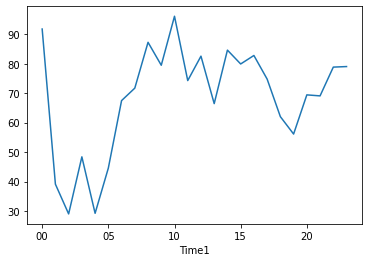

In [38]:
#createline(speed_time)
speed_time.plot(kind="line")

<AxesSubplot:xlabel='Download_Speed', ylabel='population'>

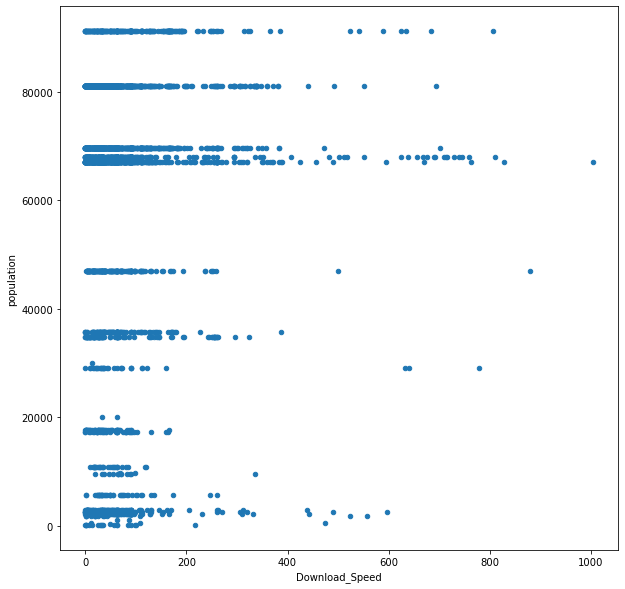

In [39]:
cs_df.plot(kind='scatter', x='Download_Speed', y='population', figsize=(10,10))

### Interactive Visualization

In [40]:
#Interactive boxplot to view internet performance by provider and location (user defined function #1)
w_provider = widgets.Dropdown(
    description = 'provider',
    options = ['All Providers'] + sorted(list(set(cs_df.Provider))),
    value = 'All Providers',
    style = {"description_width": '50px'},
    layout = Layout(width="20%")
)

w_city = widgets.Dropdown(
    description = 'city',
    options = ['All Cities'] + sorted(list(set(cs_df.city_name))),
    value = 'All Cities',
    style = {"description_width": '50px'},
    layout = Layout(width="20%")
)

w_test_type = widgets.ToggleButtons(
    description = 'type',
    options = ['Business', 'Home', 'Mobile', 'Work', 'All Types'],
    value = 'All Types',
    style = {"description_width": '50px'},
    layout = Layout(width='100%')
)

def view(ttype, provider, city):
    if provider == "All Providers":
        df_tmp = cs_df
    else: 
        df_tmp = cs_df[cs_df.Provider == provider]
        
    if city == "All Cities":
        df_tmp = df_tmp
    else:
        df_tmp = df_tmp[df_tmp.city_name == city]
    
    if ttype == 'All Types':
        df_tmp = df_tmp
    else:
        df_tmp = df_tmp[df_tmp.How_Are_You_Testing == ttype]
        
    title = "Internet Performance by {} in {} for {}".format(provider, city, ttype)
    df_tmp[["Price_Per_Month"]].plot(kind = "box", title = title, figsize = (10,5))
    
i = interactive(view, provider = w_provider, city = w_city, ttype = w_test_type)
display(i)

interactive(children=(ToggleButtons(description='type', index=4, layout=Layout(width='100%'), options=('Busine…

In [41]:
#importing Modules
#!pip install -U textblob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from textblob import TextBlob

In [42]:
#Market Price Analysis
series1=cs_df.groupby(["Provider"]).Response.sum()
series1 = series1.sort_values(ascending=True)
series1

Provider
Atlantech               166
Verizon                 514
T Mobile               3969
Unknown                5622
Atlantech Online       5656
Windstream DSL         6814
Allied Telecom        12251
Comcast Business      21891
Other                 52900
Verizon DSL          191224
RCN                  266730
Comcast             3532883
Verizon Fios        5374921
Name: Response, dtype: int64

In [43]:
series2=cs_df.groupby(["Provider"]).Price_Per_Month.mean()
series2 = series2.sort_values(ascending=True)

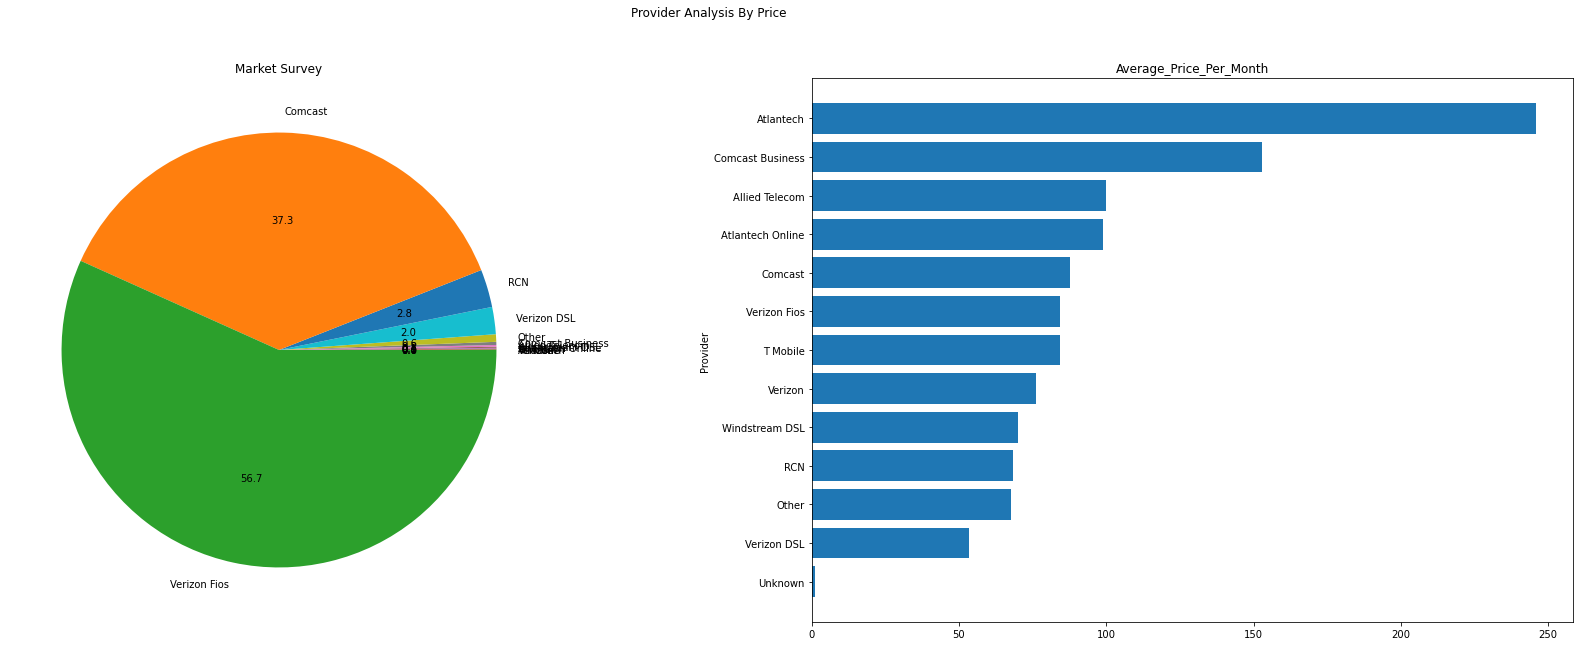

In [44]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(30,10))
ax1 = axs[0]
ax2 = axs[1]

ax1.pie(series1.values, labels=series1.index, autopct='%.1f')
ax1.set(title="Market Survey")

ax2.barh(series2.index, series2.values)
ax2.set(ylabel="Provider", title="Average_Price_Per_Month")

fig.suptitle("Provider Analysis By Price")
plt.show()

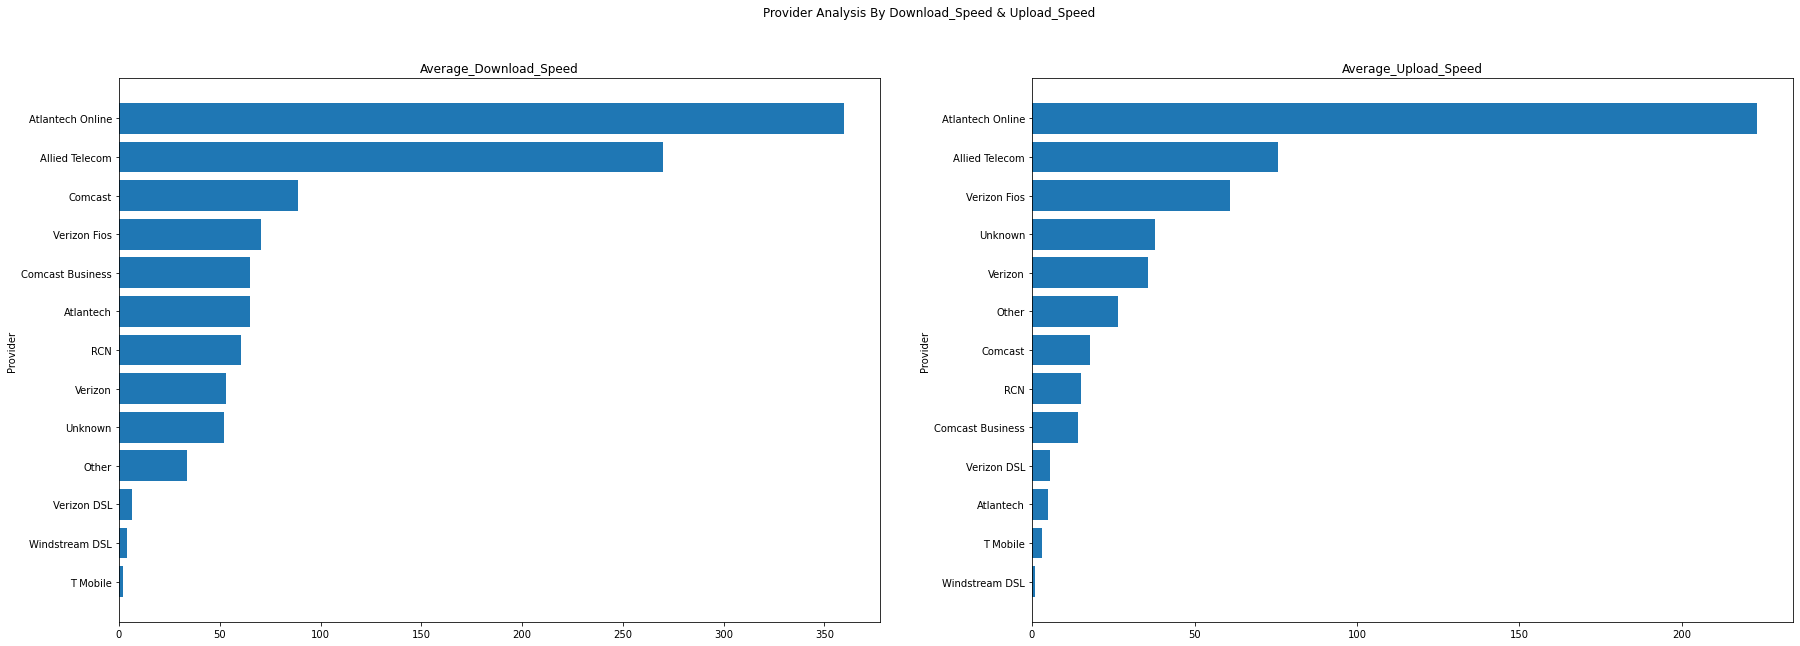

In [45]:
# Provider Performance Analysis
series3=cs_df.groupby(["Provider"]).Download_Speed.mean()
series3 = series3.sort_values(ascending=True)
series4=cs_df.groupby(["Provider"]).Upload_Speed.mean()
series4 = series4.sort_values(ascending=True)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(30,10))
ax1 = axs[0]
ax2 = axs[1]

ax1.barh(series3.index, series3.values)
ax1.set(ylabel="Provider", title="Average_Download_Speed")

ax2.barh(series4.index, series4.values)
ax2.set(ylabel="Provider", title="Average_Upload_Speed")

fig.suptitle("Provider Analysis By Download_Speed & Upload_Speed")
plt.show()

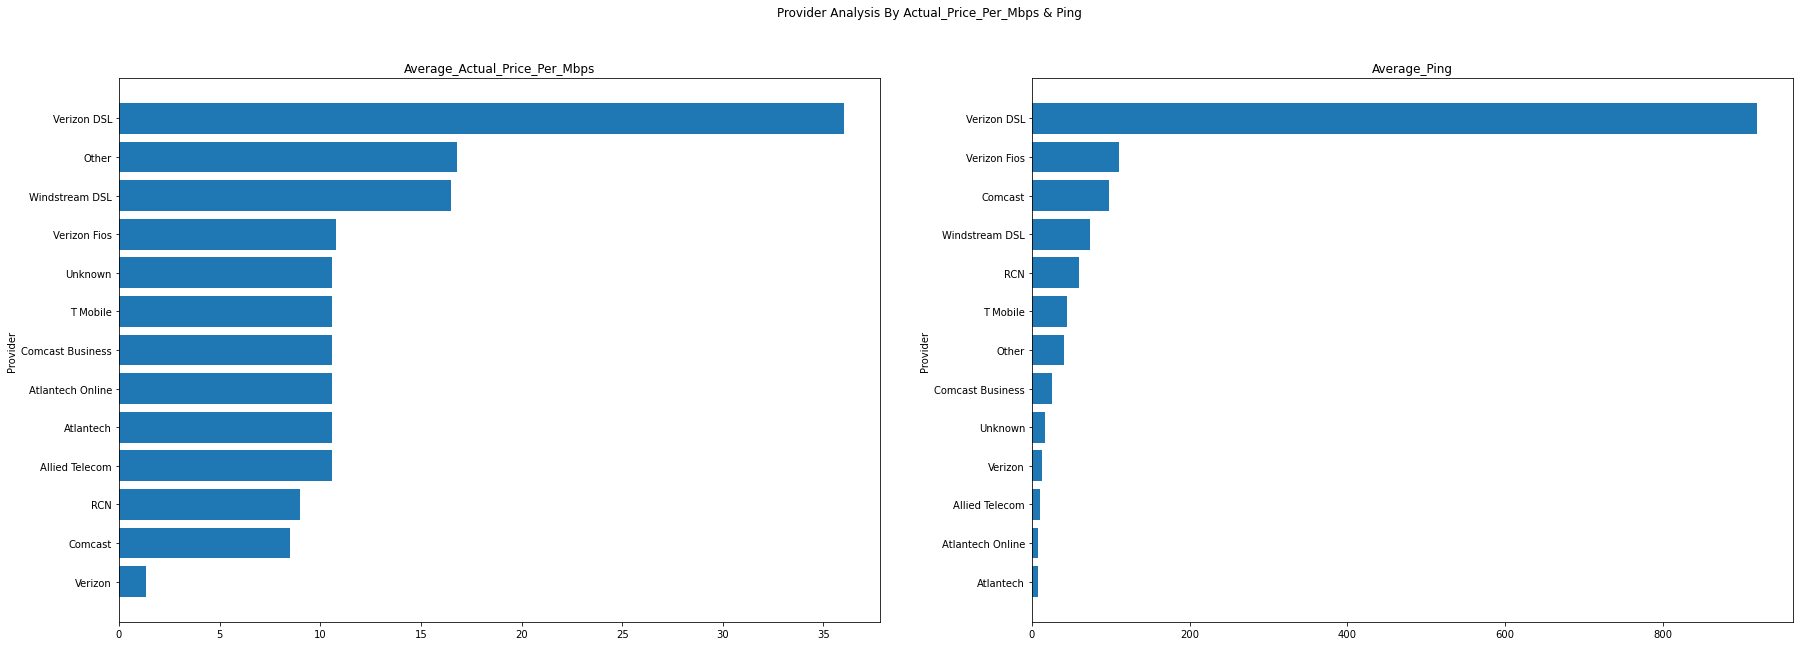

In [46]:
# Provider Performance Analysis
series5=cs_df.groupby(["Provider"]).Actual_Price_Per_Mbps.mean()
series5 = series5.sort_values(ascending=True)
series6=cs_df.groupby(["Provider"]).Ping.mean()
series6 = series6.sort_values(ascending=True)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(30,10))
ax1 = axs[0]
ax2 = axs[1]

ax1.barh(series5.index, series5.values)
ax1.set(ylabel="Provider", title="Average_Actual_Price_Per_Mbps")

ax2.barh(series6.index, series6.values)
ax2.set(ylabel="Provider", title="Average_Ping")

fig.suptitle("Provider Analysis By Actual_Price_Per_Mbps & Ping")
plt.show()

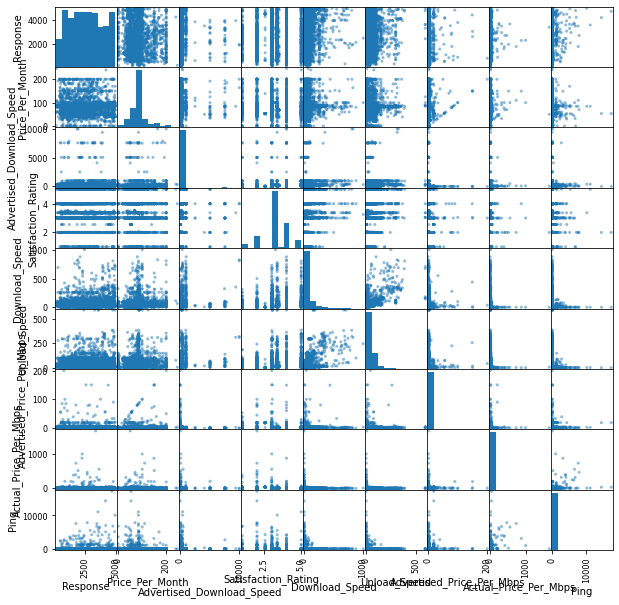

In [47]:
#Create correlation matrix with visualization (except zipcode)
pd.plotting.scatter_matrix(cs_df[["Response", "Date", "Time", "How_Are_You_Testing", "Provider", "How_are_you_connected","Price_Per_Month","Advertised_Download_Speed","Satisfaction_Rating","Download_Speed","Upload_Speed","Advertised_Price_Per_Mbps","Actual_Price_Per_Mbps","Ping"]], figsize=(10,10), diagonal="hist");

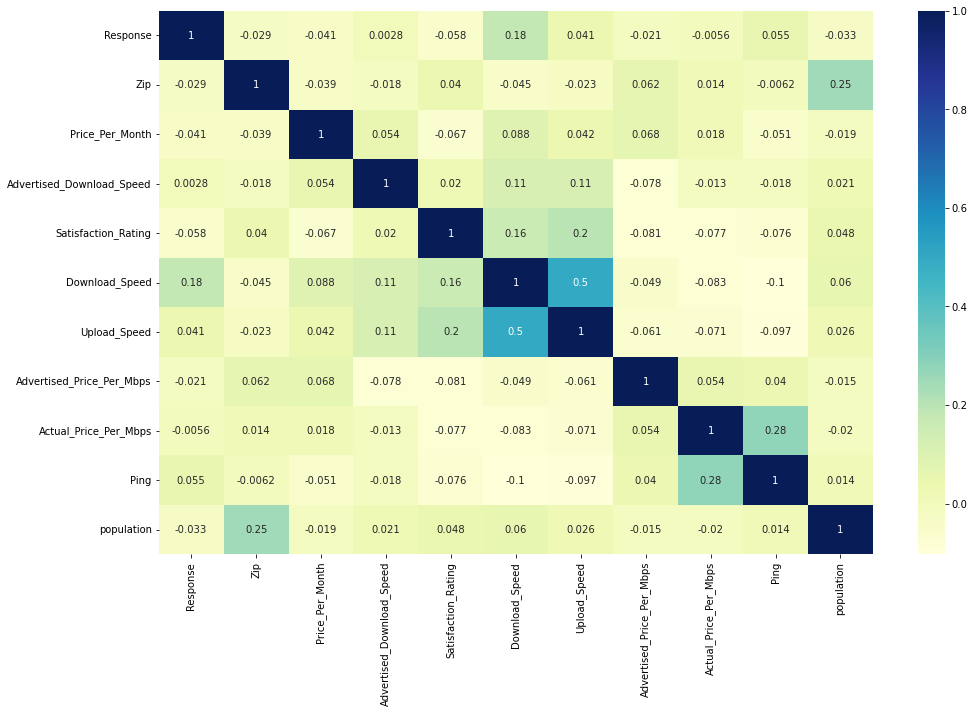

In [48]:
# import modules
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16,10))  
# plotting correlation heatmap
dataplot = sb.heatmap(cs_df.corr(), cmap="YlGnBu", annot=True)
mp.show()

In [49]:
#Price_Per_Month over time , very random no pattern of trend to follow
cs_df["Date"] = cs_df["Date"].apply(pd.to_datetime)
cs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3640 entries, 4 to 4074
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Response                   3640 non-null   int64         
 1   Date                       3640 non-null   datetime64[ns]
 2   Time                       3640 non-null   object        
 3   How_Are_You_Testing        3640 non-null   object        
 4   Zip                        3640 non-null   int64         
 5   Provider                   3640 non-null   object        
 6   How_are_you_connected      3640 non-null   object        
 7   Price_Per_Month            3640 non-null   float64       
 8   Advertised_Download_Speed  3640 non-null   float64       
 9   Satisfaction_Rating        3640 non-null   float64       
 10  Download_Speed             3640 non-null   int64         
 11  Upload_Speed               3640 non-null   int64         
 12  Advert

In [50]:
cs_df.set_index("Date" , inplace=True)

<AxesSubplot:title={'center':'Price_Per_Month over time'}, xlabel='Date'>

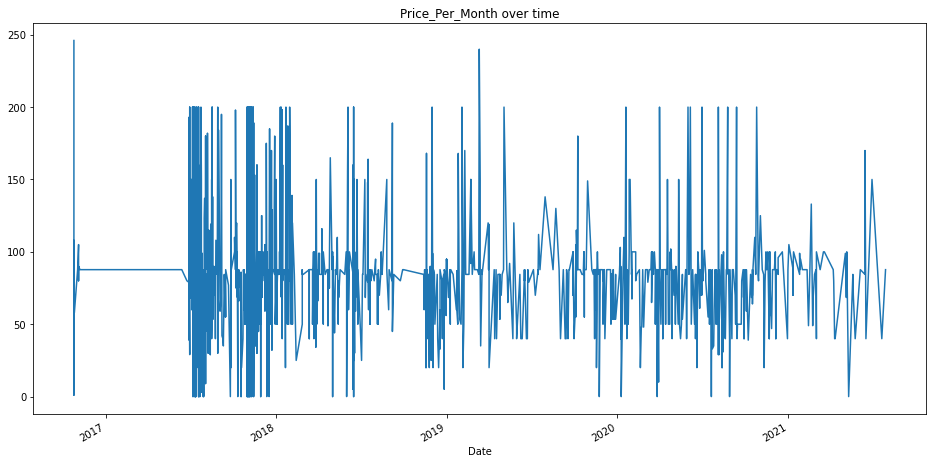

In [51]:
cs_df["Price_Per_Month"].plot(figsize=(16,8) , title = 'Price_Per_Month over time')

Text(0.5, 1.0, 'Participated Survey Trend')

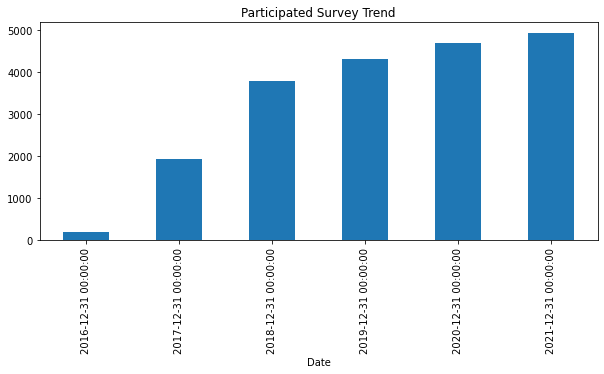

In [52]:
#Participated surveying People mean resample
cs_df["Response"].resample('Y').mean().plot(kind='bar',figsize = (10,4))
plt.title('Participated Survey Trend')

Text(0.5, 1.0, 'Actual_Price_Per_Mbps Trend')

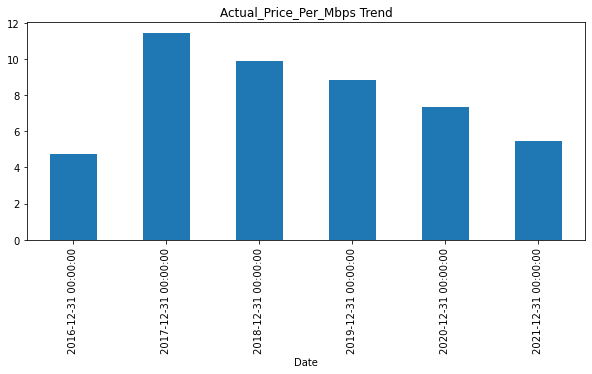

In [53]:
#Actual_Price_Per_Mbps mean resample
cs_df["Actual_Price_Per_Mbps"].resample('Y').mean().plot(kind='bar',figsize = (10,4))
plt.title('Actual_Price_Per_Mbps Trend')

Text(0.5, 1.0, 'Download_Speed Performance Trend')

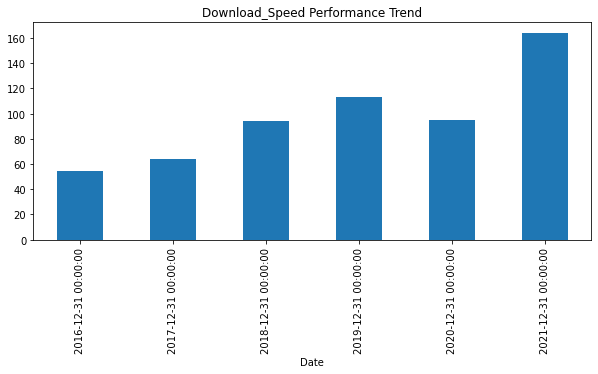

In [54]:
#Download_Speed mean resample
cs_df["Download_Speed"].resample('Y').mean().plot(kind='bar',figsize = (10,4))
plt.title('Download_Speed Performance Trend')

Text(0.5, 1.0, 'Upload_Speed Performance Trend')

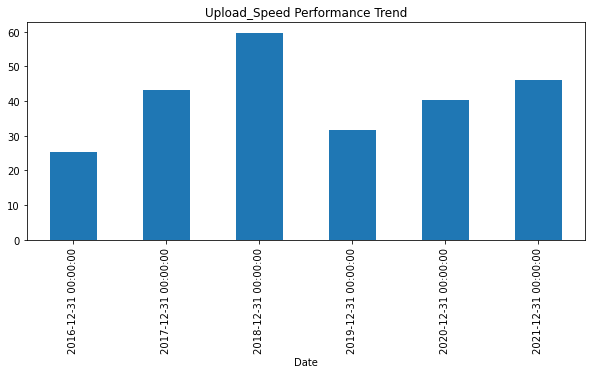

In [55]:
#Upload_Speed mean resample
cs_df["Upload_Speed"].resample('Y').mean().plot(kind='bar',figsize = (10,4))
plt.title('Upload_Speed Performance Trend')

Text(0.5, 1.0, 'Ping Performance Trend')

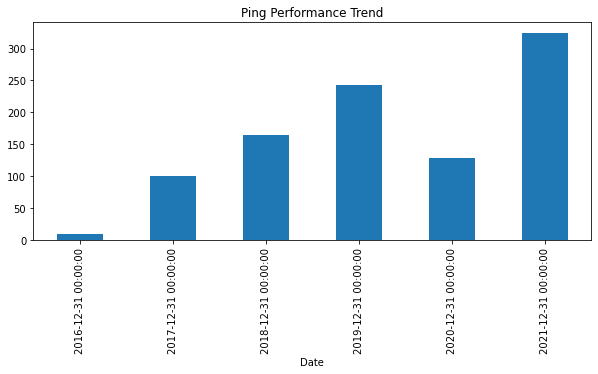

In [56]:
#Ping mean resample
cs_df["Ping"].resample('Y').mean().plot(kind='bar',figsize = (10,4))
plt.title('Ping Performance Trend')

## Machine Learning Models

### Add Target Column, Assign Features and Target, Split Data into Training & Testing

In [57]:
#create target column
cs_df["satisfaction"] = cs_df.Satisfaction_Rating.apply(lambda x: 0 if x <= 2.5 else 1)

In [58]:
cs_df[cs_df.satisfaction == 0]

,Response,Time,How_Are_You_Testing,Zip,Provider,How_are_you_connected,Price_Per_Month,Advertised_Download_Speed,Satisfaction_Rating,Download_Speed,Upload_Speed,Advertised_Price_Per_Mbps,Actual_Price_Per_Mbps,Ping,city_name,population,Year,Month,Time1,satisfaction
Date,,,,,,,,,,,,,,,,,,,,
2017-07-16,1156,20:16,Home,20906,Verizon DSL,Wired,53.457143,9.565217,2.0,1,0,18.809524,36.000000,1398.0,Silver Spring,81015.0,2017,07,20,0
2017-11-14,3273,19:10,Home,20906,Comcast,Wired,75.000000,227.512766,1.0,6,2,3.360382,8.513126,88.0,Silver Spring,81015.0,2017,11,19,0
2017-10-31,2137,18:09,Home,20816,Verizon Fios,"Wired with WiFi, multiple devices in household",150.000000,389.284830,2.0,8,14,2.241128,10.768881,23.0,Bethesda,68056.0,2017,10,18,0
2018-01-14,3522,18:21,Home,20904,Comcast,"Wired with WiFi, multiple devices in household",198.000000,200.000000,2.0,68,13,1.000000,3.000000,20.0,Silver Spring,81015.0,2018,01,18,0
2017-11-01,2233,19:56,Home,20901,Verizon Fios,"Wired with WiFi, single device",88.000000,100.000000,2.0,24,30,1.000000,4.000000,12.0,Silver Spring,81015.0,2017,11,19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-23,4893,19:17,Home,20905,Verizon Fios,Wired,80.000000,10.000000,2.0,11,12,8.000000,8.000000,9.0,Silver Spring,81015.0,2020,11,19,0
2020-11-29,4900,17:30,Home,20906,Comcast,Wired,87.692308,400.000000,1.0,40,15,3.360382,8.513126,23.0,Silver Spring,81015.0,2020,11,17,0
2020-12-06,4903,21:43,Home,20850,Comcast,"Wired with WiFi, multiple devices in household",40.000000,200.000000,2.0,37,5,0.000000,1.000000,43.0,Rockville,67117.0,2020,12,21,0


In [59]:
features = ["Price_Per_Month", "Download_Speed", "Upload_Speed", "Ping"]
target = "satisfaction"

In [60]:
X = cs_df[features]
y = cs_df[target]

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

### Supervised Learning

In [62]:
summary = dict()
models = dict()

#### K Nearest Neighbor (KNN)

In [63]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier(n_neighbors=1)
knc

KNeighborsClassifier(n_neighbors=1)

In [64]:
knc.fit(X_train, y_train)
knc.score(X_train, y_train),knc.score(X_test, y_test)

(1.0, 0.7494505494505495)

In [65]:
summary["k-NNs"] = round(knc.score(X_test, y_test), 3)
models["k-NNs"] = knc
summary

{'k-NNs': 0.749}

#### Decision Tree

In [66]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=0)
dtc

DecisionTreeClassifier(random_state=0)

In [67]:
dtc.fit(X_train, y_train)
dtc.score(X_train, y_train),dtc.score(X_test, y_test)

(1.0, 0.765934065934066)

In [68]:
summary["Decision Trees"] = round(dtc.score(X_test, y_test), 3)
models["Decision Trees"] = dtc
summary

{'k-NNs': 0.749, 'Decision Trees': 0.766}

#### Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0)
rfc

RandomForestClassifier(random_state=0)

In [70]:
rfc.fit(X_train, y_train)
rfc.score(X_train, y_train),rfc.score(X_test, y_test)

(1.0, 0.8395604395604396)

In [71]:
summary["Random Forest"] = round(rfc.score(X_test, y_test), 3)
models["Random Forest"] = rfc
summary

{'k-NNs': 0.749, 'Decision Trees': 0.766, 'Random Forest': 0.84}

#### Linear Support Vector Machines (SVM)

In [72]:
from sklearn.svm import LinearSVC

lsvc = LinearSVC(random_state=0)
lsvc

LinearSVC(random_state=0)

In [73]:
lsvc.fit(X_train, y_train)
lsvc.score(X_train, y_train),lsvc.score(X_test, y_test) 

C:\Users\andre\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


(0.22967032967032966, 0.24065934065934066)

In [74]:
summary["Linear SVMs"] = round(lsvc.score(X_test, y_test), 3)
models["Linear SVMs"] = lsvc
summary

{'k-NNs': 0.749,
 'Decision Trees': 0.766,
 'Random Forest': 0.84,
 'Linear SVMs': 0.241}

#### Kernelized Support Vector Machines (SVM)

In [75]:
from sklearn.svm import SVC

svc = SVC(C=1.0, kernel="rbf", gamma="scale", random_state=0)
svc

SVC(random_state=0)

In [76]:
svc.fit(X_train, y_train)
svc.score(X_train, y_train),svc.score(X_test, y_test) 

(0.8446886446886447, 0.8483516483516483)

In [77]:
summary["Kernelized SVMs"] = round(svc.score(X_test, y_test), 3)
models["Kernelized SVMs"] = svc
summary

{'k-NNs': 0.749,
 'Decision Trees': 0.766,
 'Random Forest': 0.84,
 'Linear SVMs': 0.241,
 'Kernelized SVMs': 0.848}

#### Neural Networks

In [78]:
from sklearn.neural_network import MLPClassifier

mlpc = MLPClassifier(hidden_layer_sizes=(10,), random_state=0)
mlpc

MLPClassifier(hidden_layer_sizes=(10,), random_state=0)

In [79]:
mlpc.fit(X_train, y_train)
mlpc.score(X_train, y_train),mlpc.score(X_test, y_test)  

(0.8340659340659341, 0.832967032967033)

In [80]:
summary["Neural Networks"] = round(mlpc.score(X_test, y_test), 3)
models["Neural Networks"] = mlpc
summary

{'k-NNs': 0.749,
 'Decision Trees': 0.766,
 'Random Forest': 0.84,
 'Linear SVMs': 0.241,
 'Kernelized SVMs': 0.848,
 'Neural Networks': 0.833}

#### Model Evaluation

In [81]:
summary

{'k-NNs': 0.749,
 'Decision Trees': 0.766,
 'Random Forest': 0.84,
 'Linear SVMs': 0.241,
 'Kernelized SVMs': 0.848,
 'Neural Networks': 0.833}

In [82]:
best_model = max(summary, key = summary.get)
final_model = models[best_model]
final_model

SVC(random_state=0)

In [83]:
#features = ["Price_Per_Month", "Actual_Price_Per_Mbps", "Download_Speed", "Upload_Speed", "Ping"]
def prediction():
    prediction_values = []
    print("Enter price per month: ")
    prediction_values.append(float(input()))
    print("Enter download speed: ")
    prediction_values.append(float(input()))
    print("Enter upload speed: ")
    prediction_values.append(float(input()))
    print("Enter ping: ")
    prediction_values.append(float(input()))
    
    prediction_df = pd.DataFrame(columns = features)
    prediction_df.loc[0] = prediction_values
    final_prediction = final_model.predict(prediction_df)[0]
   
    if final_prediction == 1:
        result = "Satisfied"
    elif final_prediction == 0:
        result = "Unsatisfied"
    return "Prediction using {} Model: {} Customer".format(best_model, result)

In [84]:
prediction()

Enter price per month: 
50
Enter download speed: 
30
Enter upload speed: 
13
Enter ping: 
80


'Prediction using Kernelized SVMs Model: Satisfied Customer'

### Unsupervised Learning

In [85]:
#Defining Features
features = ["Price_Per_Month","Actual_Price_Per_Mbps","Download_Speed","Upload_Speed","Ping"]
X = cs_df[features]
X

,Price_Per_Month,Actual_Price_Per_Mbps,Download_Speed,Upload_Speed,Ping
Date,,,,,
2017-11-06,87.692308,8.513126,99,13,16.0
2017-07-07,87.692308,8.513126,33,6,23.0
2017-07-07,87.692308,8.513126,58,16,12.0
2017-10-31,84.419505,10.768881,62,105,7.0
2017-08-20,87.692308,8.513126,130,7,14.0
...,...,...,...,...,...
2021-06-30,150.000000,4.000000,37,12,22.0
2021-07-21,40.000000,2.000000,20,4,42.0
2021-07-21,40.000000,1.000000,38,5,43.0


#### K-Means Clustering

We are going to perform clustering analysis on the dataset and use the elbow method to determine the optimal number of clusters

In [86]:
from sklearn.cluster import KMeans

distortions = []
models = {}

In [87]:
K = range(1,10)

for k in K:
    kmeans = KMeans(n_clusters = k, random_state = 0)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)
    models[k] = kmeans

#### Model Evaluation

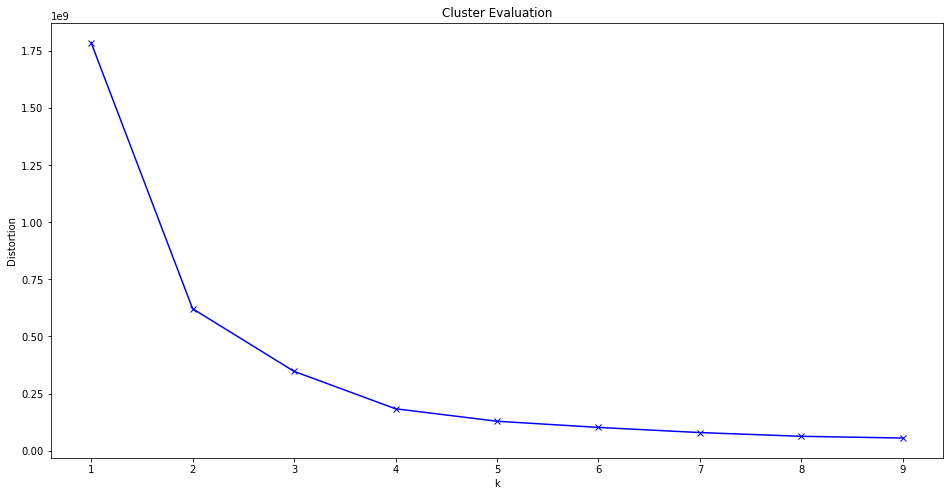

In [88]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Cluster Evaluation')
plt.show()

In [89]:
final_k = 3
final_model = models[final_k]
final_model

KMeans(n_clusters=3, random_state=0)

In [90]:
final_model.fit(X)
cs_df["label"] = final_model.predict(X)

In [91]:
cs_df.label.value_counts()

0    3588
2      48
1       4
Name: label, dtype: int64

In [92]:
cluster_1st, cluster_2nd, cluster_3rd = cs_df.label.value_counts().index
cluster_1st, cluster_2nd, cluster_3rd

(0, 2, 1)

#### Cluster 1

In [93]:
cs_df[cs_df.label == cluster_1st].sample(n=10, random_state=0)

,Response,Time,How_Are_You_Testing,Zip,Provider,How_are_you_connected,Price_Per_Month,Advertised_Download_Speed,Satisfaction_Rating,Download_Speed,...,Advertised_Price_Per_Mbps,Actual_Price_Per_Mbps,Ping,city_name,population,Year,Month,Time1,satisfaction,label
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-29,4506,11:59,Home,20878,Comcast,Wired,150.000000,600.000000,3.043548,116,...,0.000000,1.000000,44.0,Gaithersburg,69657.0,2020,01,11,1,0
2017-12-23,3459,13:26,Home,20850,Comcast,Wired,87.692308,227.512766,3.043548,43,...,3.360382,8.513126,15.0,Rockville,67117.0,2017,12,13,1,0
2017-07-09,869,23:21,Home,20854,Verizon Fios,"Wired with WiFi, multiple devices in household",75.000000,5.000000,2.000000,59,...,15.000000,1.000000,15.0,Potomac,47018.0,2017,07,23,0,0
2017-07-07,528,15:10,Home,20906,Verizon DSL,"Wired with WiFi, single device",65.000000,9.565217,2.000000,3,...,18.809524,36.000000,120.0,Silver Spring,81015.0,2017,07,15,0,0
2017-10-31,1753,14:22,Home,20878,Verizon Fios,"Wired with WiFi, multiple devices in household",75.000000,1000.000000,3.000000,120,...,0.000000,1.000000,13.0,Gaithersburg,69657.0,2017,10,14,1,0
2017-10-31,2071,16:55,Home,20872,Comcast,"Wired with WiFi, multiple devices in household",39.000000,100.000000,4.000000,130,...,0.000000,0.000000,19.0,Damascus,17224.0,2017,10,16,1,0
2017-10-27,1634,19:57,Home,20877,Verizon Fios,Wired,84.419505,389.284830,3.369165,61,...,2.241128,10.768881,10.0,Gaithersburg,69657.0,2017,10,19,1,0
2017-11-02,2783,17:39,Home,20906,Verizon Fios,"Wired with WiFi, multiple devices in household",100.000000,389.284830,3.000000,41,...,2.241128,10.768881,16.0,Silver Spring,81015.0,2017,11,17,1,0
2017-11-01,2546,12:26,Home,20906,Verizon Fios,Wired,40.000000,75.000000,5.000000,6,...,1.000000,6.000000,87.0,Silver Spring,81015.0,2017,11,12,1,0


#### Cluster 2

In [94]:
cs_df[cs_df.label == cluster_2nd].sample(n=10, random_state=0)

,Response,Time,How_Are_You_Testing,Zip,Provider,How_are_you_connected,Price_Per_Month,Advertised_Download_Speed,Satisfaction_Rating,Download_Speed,...,Advertised_Price_Per_Mbps,Actual_Price_Per_Mbps,Ping,city_name,population,Year,Month,Time1,satisfaction,label
Date,,,,,,,,,,,,,,,,,,,,,
2017-07-08,763,10:58,Home,20817,Verizon DSL,"Wired with WiFi, single device",53.457143,9.565217,2.551724,0,...,18.809524,36.000000,2484.0,Bethesda,68056.0,2017,07,10,1,2
2017-10-31,1801,14:31,Work,20814,Verizon Fios,"Wired with WiFi, multiple devices in household",84.419505,389.284830,3.369165,8,...,2.241128,10.768881,3017.0,Bethesda,68056.0,2017,10,14,1,2
2017-09-07,1536,12:37,Home,20904,Verizon DSL,"Wired with WiFi, single device",42.000000,1.000000,1.000000,1,...,39.000000,44.000000,2775.0,Silver Spring,81015.0,2017,09,12,0,2
2017-10-31,1750,14:21,Home,20878,Verizon Fios,"Wired with WiFi, multiple devices in household",110.000000,100.000000,2.000000,0,...,1.000000,733.000000,7604.0,Gaithersburg,69657.0,2017,10,14,0,2
2017-10-31,2077,16:59,Home,20816,Verizon Fios,"Wired with WiFi, multiple devices in household",84.419505,389.284830,4.000000,0,...,2.241128,10.768881,3231.0,Bethesda,68056.0,2017,10,16,1,2
2018-05-06,3696,10:20,Home,20855,Verizon Fios,Wired,44.000000,38.000000,3.000000,0,...,1.000000,244.000000,6330.0,Derwood,2535.0,2018,05,10,1,2
2017-11-01,2257,20:22,Home,20832,Verizon Fios,"Wired with WiFi, multiple devices in household",149.000000,75.000000,4.000000,0,...,2.000000,876.000000,3126.0,Olney,35820.0,2017,11,20,1,2
2019-02-09,4188,08:07,Home,20901,Verizon Fios,"Wired with WiFi, multiple devices in household",170.000000,389.284830,3.000000,0,...,2.241128,10.768881,5080.0,Silver Spring,81015.0,2019,02,08,1,2
2017-07-11,995,07:02,Home,20910,Comcast,"Wired with WiFi, multiple devices in household",40.000000,25.000000,3.000000,26,...,2.000000,2.000000,2281.0,Silver Spring,81015.0,2017,07,07,1,2


#### Cluster 3

In [95]:
cs_df[cs_df.label == cluster_3rd] #only 4 rows in this cluster

,Response,Time,How_Are_You_Testing,Zip,Provider,How_are_you_connected,Price_Per_Month,Advertised_Download_Speed,Satisfaction_Rating,Download_Speed,...,Advertised_Price_Per_Mbps,Actual_Price_Per_Mbps,Ping,city_name,population,Year,Month,Time1,satisfaction,label
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-29,3556,21:43,Home,20878,Verizon Fios,Wired,84.419505,389.284830,5.000000,0,...,2.241128,10.768881,11104.0,Gaithersburg,69657.0,2018,01,21,1,1
2019-01-29,4169,11:49,Home,20906,Verizon DSL,Wired,53.457143,9.565217,2.000000,0,...,18.809524,36.000000,14358.0,Silver Spring,81015.0,2019,01,11,0,1
2020-05-20,4705,17:55,Home,20852,Verizon DSL,Wired,53.457143,9.565217,2.000000,0,...,18.809524,36.000000,17240.0,Rockville,67117.0,2020,05,17,0,1
2021-06-15,4963,19:30,Home,20853,Verizon Fios,"Wired with WiFi, multiple devices in household",84.419505,389.284830,3.369165,0,...,2.241128,10.768881,10098.0,Rockville,67117.0,2021,06,19,1,1


### Cluster Interpretation
##### Cluster1: Highest paying group (High performace in download/upload speed)
##### Cluster2: Average paying group (Average performance but has lowest satisfaction rating)
##### Cluster3: Lowest paying group (Low performance in download/upload speed)

In [96]:
cs_df.groupby("label").mean()

,Response,Zip,Price_Per_Month,Advertised_Download_Speed,Satisfaction_Rating,Download_Speed,Upload_Speed,Advertised_Price_Per_Mbps,Actual_Price_Per_Mbps,Ping,population,satisfaction
label,,,,,,,,,,,,
0,2599.798774,20869.699833,84.568872,318.562310,3.253429,75.680323,44.593645,3.051305,9.078771,54.585849,60220.832776,0.845875
1,4348.250000,20872.250000,68.938324,199.425024,3.092291,0.000000,0.500000,10.525326,23.384440,13200.000000,71226.500000,0.500000
2,2709.791667,20864.083333,70.074393,316.053502,2.869881,11.354167,7.500000,3.279076,122.173575,4044.541667,60419.458333,0.708333


In [97]:
#Front-end user-defined function to show users their options with preferred price and speed.

def myOptions():
    print("Enter your city: ")
    cty = str(input())
    #check if city exists in data
    if cty not in cs_df["city_name"].unique():
        return "Invalid city."
    print("Enter your preferred price: ")
    prefprice = float(input())
    print("Enter your preferred download speed: ")
    prefdown = float(input())
    
    #setting new dataframe
    newdf = cs_df[cs_df.city_name == cty]
    newdf2 = newdf[(newdf.Price_Per_Month <= prefprice) & (newdf.Download_Speed >= prefdown) & (newdf.Provider != "Other")][["Provider", "Price_Per_Month", "Download_Speed", "Upload_Speed", "Actual_Price_Per_Mbps"]]
    
    
    #check if dataframe is empty
    if len(newdf2.index) == 0:
        return "No users with these parameters."
    
    #get price/mbps for each provider
    perMbpsMean = newdf2.groupby("Provider").Actual_Price_Per_Mbps.mean()
    perMbpsMeanDf = perMbpsMean.to_frame()
    bestDeal = "{:.2f}".format(float(perMbpsMean.min()))
    
    #return best provider, given constraints
    bestDealProvider = str(perMbpsMeanDf.idxmin())
    bestDealProvider = bestDealProvider[25:][:-14]

    avgPrice = float(newdf2[(newdf2.Provider == bestDealProvider)].Price_Per_Month.mean())
    avgDown = float(newdf2[(newdf2.Provider == bestDealProvider)].Download_Speed.mean())
    finalPrice = "{:.2f}".format(avgPrice)
    finalDown = "{:.2f}".format(avgDown)

    print(cty + " users had the best service with " + str(bestDealProvider) + ", paying $" + str(bestDeal) + " per Mbps.")
    print("In " + cty + ", " + str(bestDealProvider) + " has an average price of $" + str(finalPrice) + " per month.")
    print("In " + cty + ", " + str(bestDealProvider) + " has an average download speed of " + str(finalDown) + " Mbps.")
    createbar(perMbpsMean)

Enter your city: 
Bethesda
Enter your preferred price: 
90
Enter your preferred download speed: 
30
Bethesda users had the best service with RCN, paying $3.40 per Mbps.
In Bethesda, RCN has an average price of $50.54 per month.
In Bethesda, RCN has an average download speed of 60.10 Mbps.


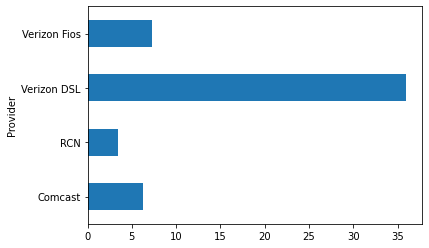

In [98]:
myOptions()